In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('df.csv')

df.head()



,gen,fitness,layers,lr,batch_size
0,1.0,0.833333,15.0,0.01,16.0
1,1.0,0.825000,12.0,0.01,4.0
2,1.0,0.458333,15.0,0.10,1.0
3,1.0,0.825000,12.0,0.10,8.0
4,1.0,0.808333,15.0,0.01,2.0


<Figure size 432x288 with 0 Axes>

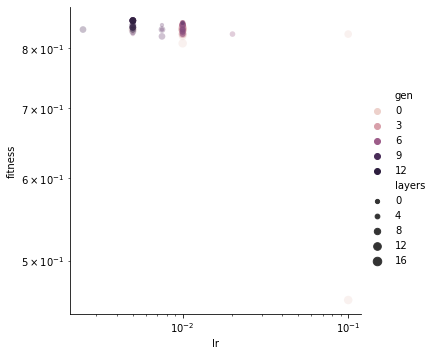

In [7]:
plt.figure()
sns.relplot(data=df, y='fitness', x='lr', hue='gen',
            kind='scatter', size='layers', alpha=0.3, edgecolor='none'
            )
plt.yscale('log')
plt.xscale('log')
